# Establishing a Baseline for the Problem

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

import pprint
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Importing the required datasets

In [2]:
rice = pd.read_csv("/Users/macbook/Documents/BTP/Notebook/Rice.csv")
rice.head()

,State_Name,ind_district,Crop_Year,Season,Crop,Area,Production,Value
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,3.147059
1,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,3.614458
2,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,2.700000
3,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,1.734038
4,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,1.370797


In [3]:
rice_haryana = rice[rice["State_Name"]=="Haryana"]
rice_haryana.head()

,State_Name,ind_district,Crop_Year,Season,Crop,Area,Production,Value
4210,Haryana,AMBALA,1997,Kharif,Rice,65000.0,182000.0,2.800000
4211,Haryana,AMBALA,1998,Kharif,Rice,71365.0,186000.0,2.606320
4212,Haryana,AMBALA,1999,Kharif,Rice,72185.0,206000.0,2.853778
4213,Haryana,AMBALA,2000,Kharif,Rice,71840.0,217000.0,3.020601
4214,Haryana,AMBALA,2001,Kharif,Rice,74881.0,233000.0,3.111604


In [4]:
rainfall = pd.read_csv("/Users/macbook/Documents/BTP/Notebook/rainfall.csv")
rainfall.head()

,State,ind_district,Year,Value
0,Andhra Pradesh,Adilabad,1994,1199.447
1,Andhra Pradesh,Adilabad,1995,1255.561
2,Andhra Pradesh,Adilabad,1996,1081.171
3,Andhra Pradesh,Adilabad,1997,905.718
4,Andhra Pradesh,Adilabad,1998,1128.950


In [5]:
rain_haryana = rainfall[rainfall["State"]=="Haryana"]
print(rain_haryana.head())
print(rain_haryana.describe())

        State ind_district  Year    Value
1179  Haryana       Ambala  1994  620.808
1180  Haryana       Ambala  1995  832.320
1181  Haryana       Ambala  1996  784.208
1182  Haryana       Ambala  1997  784.650
1183  Haryana       Ambala  1998  649.086
              Year       Value
count   171.000000  171.000000
mean   1998.000000  531.810170
std       2.589572  165.230096
min    1994.000000  166.299000
25%    1996.000000  420.334500
50%    1998.000000  531.747000
75%    2000.000000  646.928500
max    2002.000000  895.146000


In [6]:
X_hr = pd.read_csv("/Users/macbook/Documents/BTP/Notebook/haryana.csv")
X_hr.head()

,ind_district,Crop_Year,Y,X1,X2,X3,X4
0,AMBALA,1997,182000.0,NaN,NaN,784.650,784.208
1,AMBALA,1998,186000.0,182000.0,NaN,649.086,784.650
2,AMBALA,1999,206000.0,186000.0,182000.0,396.134,649.086
3,AMBALA,2000,217000.0,206000.0,186000.0,593.737,396.134
4,AMBALA,2001,233000.0,217000.0,206000.0,469.118,593.737


Cleaning and preparing the datasets

In [7]:
X_finite = X_hr[np.isfinite(X_hr["X1"])]
X_finite = X_finite[np.isfinite(X_finite["X2"])]
X_finite = X_finite[np.isfinite(X_finite["X3"])]
X_finite = X_finite[np.isfinite(X_finite["X4"])]
X_finite = X_finite[np.isfinite(X_finite["Y"])]
X_finite.head()

,ind_district,Crop_Year,Y,X1,X2,X3,X4
2,AMBALA,1999,206000.0,186000.0,182000.0,396.134,649.086
3,AMBALA,2000,217000.0,206000.0,186000.0,593.737,396.134
4,AMBALA,2001,233000.0,217000.0,206000.0,469.118,593.737
5,AMBALA,2002,183000.0,233000.0,217000.0,476.752,469.118
8,AMBALA,2005,254000.0,233000.0,227000.0,1058.400,1202.900


In [8]:
Xn = X_finite
Xn.describe()

,Crop_Year,Y,X1,X2,X3,X4
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,2004.204724,182771.653543,181007.874016,174322.834646,489.894449,502.577819
std,3.733883,147264.161147,147414.085609,142965.856835,211.255550,190.321342
min,1999.000000,3000.000000,2000.000000,2000.000000,126.300000,126.300000
25%,2001.000000,49000.000000,52500.000000,55500.000000,342.916000,362.211500
50%,2005.000000,166000.000000,164000.000000,160000.000000,458.600000,486.380000
75%,2007.000000,251500.000000,240500.000000,227000.000000,573.491500,605.301500
max,2010.000000,610000.000000,610000.000000,610000.000000,1433.900000,1227.900000


In [9]:
y = Xn["Y"]
X = Xn[["X1", "X2", "X3", "X4"]]

Text(0.5,1,'Distribution of the Rice Production Values')

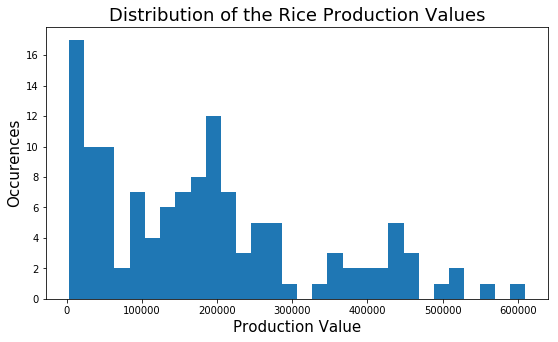

In [10]:
plt.figure(figsize=(9, 5))
plt.hist(y, bins=30)
plt.xlabel('Production Value',fontsize=15)
plt.ylabel('Occurences',fontsize=15)
plt.title('Distribution of the Rice Production Values',fontsize=18)

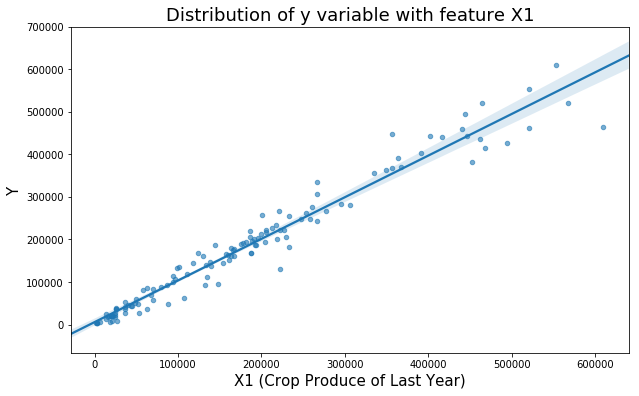

In [12]:
Xplot = Xn[["X1", "X2", "X3", "X4","Y"]]

var_name = "X1"
plt.figure(figsize=(10,6))
sns.regplot(x=var_name, y='Y', data=Xplot, scatter_kws={'alpha':0.6, 's':20})
plt.xlabel(var_name + " (Crop Produce of Last Year)", fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title("Distribution of y variable with feature "+var_name, fontsize=18)
plt.show()

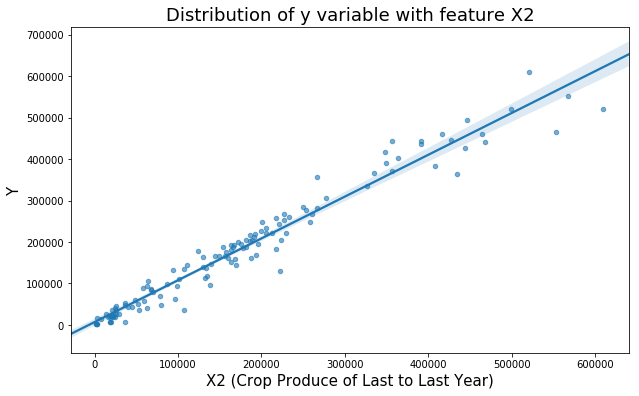

In [13]:
var_name = "X2"
plt.figure(figsize=(10,6))
sns.regplot(x=var_name, y='Y', data=Xplot, scatter_kws={'alpha':0.6, 's':20})
plt.xlabel(var_name + " (Crop Produce of Last to Last Year)", fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title("Distribution of y variable with feature "+var_name, fontsize=18)
plt.show()

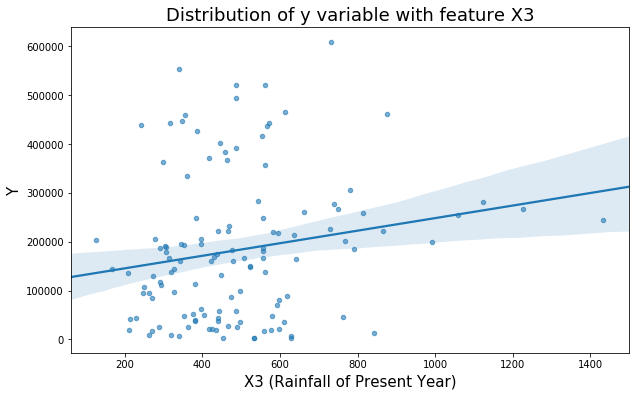

In [14]:
var_name = "X3"
plt.figure(figsize=(10,6))
sns.regplot(x=var_name, y='Y', data=Xplot, scatter_kws={'alpha':0.6, 's':20})
plt.xlabel(var_name + " (Rainfall of Present Year)", fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title("Distribution of y variable with feature "+var_name, fontsize=18)
plt.show()

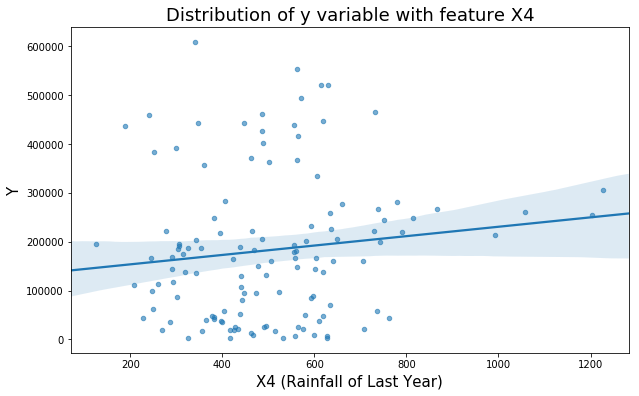

In [16]:
var_name = "X4"
plt.figure(figsize=(10,6))
sns.regplot(x=var_name, y='Y', data=Xplot, scatter_kws={'alpha':0.6, 's':20})
plt.xlabel(var_name + " (Rainfall of Last Year)", fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title("Distribution of y variable with feature "+var_name, fontsize=18)
plt.show()

In [17]:
# Z-Score Normalization
cols = list(X.columns)

for col in cols:
    col_zscore = col + '_zscore'
    X[col_zscore] = (X[col] - X[col].mean())/X[col].std(ddof=0)
X = X[["X1_zscore", "X2_zscore", "X3_zscore", "X4_zscore"]]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
X.head()

,X1_zscore,X2_zscore,X3_zscore,X4_zscore
2,0.033999,0.053912,-0.445583,0.772842
3,0.170208,0.082001,0.493496,-0.561500
4,0.245124,0.222449,-0.098737,0.480872
5,0.354091,0.299695,-0.062458,-0.176503
8,0.354091,0.369919,2.701738,3.694256


Randomly splitting the dataset into training and testing sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

First baseline using Linear Regression 

In [20]:
alg = LinearRegression()
alg.fit(X_train, y_train)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
coef = alg.coef_
coef = coef.round(decimals=2)
np.set_printoptions(suppress=True) #gem 
print("The coefficients for the linear regression model learnt are\n")
print(coef)
print()

The coefficients for the linear regression model learnt are

[ 73701.89  70350.8    2056.26    -55.16]



In [32]:
y_predict = alg.predict(X_test)
print(y_predict)

[ 190794.71627631  217357.86281974  430244.11225409   34235.77445793
  173184.31231535  360274.88117369  167266.09021242  165546.55770286
  152646.11504628  118061.29497398   29735.9087492   277750.05318838
  230629.83462277  105900.85813017  229157.1298069   166327.39577958
  433826.46108864  193360.2502063   227889.65362064  215576.84026052
  380778.16929633  175204.90646006  148388.15085371  216826.50794372
   19538.54418833   54035.97031606]


In [33]:
print(y_test)

244    200000.0
84     222000.0
138    460000.0
193      8000.0
214    189000.0
99     391000.0
241    151000.0
213    175000.0
238    160000.0
76      94000.0
196     36000.0
93     284000.0
248    267000.0
67      63000.0
82     205000.0
240    161000.0
141    383000.0
216    204000.0
247    221000.0
4      233000.0
100    402000.0
230    192000.0
229    178000.0
88     258000.0
61      14000.0
200     50000.0
Name: Y, dtype: float64


In [34]:
rmse = sqrt(mean_squared_error(y_predict, y_test))
print(rmse)

23298.87377886106


In [35]:
# print(type(y_test))
# print(type(y_predict))
yt = y_test.as_matrix()
print(type(yt))
print(yt)
y_test

<class 'numpy.ndarray'>
[ 200000.  222000.  460000.    8000.  189000.  391000.  151000.  175000.
  160000.   94000.   36000.  284000.  267000.   63000.  205000.  161000.
  383000.  204000.  221000.  233000.  402000.  192000.  178000.  258000.
   14000.   50000.]


244    200000.0
84     222000.0
138    460000.0
193      8000.0
214    189000.0
99     391000.0
241    151000.0
213    175000.0
238    160000.0
76      94000.0
196     36000.0
93     284000.0
248    267000.0
67      63000.0
82     205000.0
240    161000.0
141    383000.0
216    204000.0
247    221000.0
4      233000.0
100    402000.0
230    192000.0
229    178000.0
88     258000.0
61      14000.0
200     50000.0
Name: Y, dtype: float64

In [36]:
p = pd.DataFrame()
p["y_predicted"] = y_predict/1000
p["y_test"] = yt/1000

p["y_predicted"] = p["y_predicted"].round(decimals=1)
# p["y_test"] = p["y_test"].round(decimals=1)
p.describe()

,y_predicted,y_test
count,26.000000,26.000000
mean,196.711538,200.038462
std,111.520955,118.830124
min,19.500000,8.000000
25%,149.450000,153.250000
50%,183.000000,196.000000
75%,228.875000,251.750000
max,433.800000,460.000000


### Good enough results for the Haryana State

In [37]:
print(p)

    y_predicted  y_test
0         190.8   200.0
1         217.4   222.0
2         430.2   460.0
3          34.2     8.0
4         173.2   189.0
5         360.3   391.0
6         167.3   151.0
7         165.5   175.0
8         152.6   160.0
9         118.1    94.0
10         29.7    36.0
11        277.8   284.0
12        230.6   267.0
13        105.9    63.0
14        229.2   205.0
15        166.3   161.0
16        433.8   383.0
17        193.4   204.0
18        227.9   221.0
19        215.6   233.0
20        380.8   402.0
21        175.2   192.0
22        148.4   178.0
23        216.8   258.0
24         19.5    14.0
25         54.0    50.0


#### The Root Mean Square Error
It has the same unit as the data values.
With range of the test data set being [8,460], rmse as 23.3 is a decent one.

In [38]:
rmse/1000

23.29887377886106

# Constructing dataset for Whole India

### Preparing columns for the features, using rice production and rainfall datasets

In [48]:
rain1 = rainfall
rain2 = pd.read_csv("/Users/macbook/Documents/BTP/Notebook/rainfall_distt_2004-10_nax.csv")

In [49]:
print(rice.describe())
print(rain1.describe())
print(rain2.describe())

          Crop_Year           Area    Production         Value
count  13169.000000   13169.000000  1.314700e+04  13169.000000
mean    2005.762397   50640.056200  1.057203e+05      1.942265
std        5.063566   71019.932027  1.759126e+05      2.144512
min     1997.000000       1.000000  0.000000e+00      0.000000
25%     2001.000000    3200.000000  4.966500e+03      1.258584
50%     2006.000000   19000.000000  2.944800e+04      1.894216
75%     2010.000000   73275.890000  1.319115e+05      2.494297
max     2015.000000  687000.000000  1.710000e+06    223.727273
              Year        Value
count  4878.000000  4878.000000
mean   1998.000000  1157.397511
std       2.582254   717.308841
min    1994.000000    55.502000
25%    1996.000000   743.227500
50%    1998.000000   971.803500
75%    2000.000000  1301.227500
max    2002.000000  9357.259000
              Year        Value
count  3006.000000  3006.000000
mean   2007.007651  1242.812309
std       2.031272   872.137946
min    2004.00000

In [50]:
a = np.empty((rice.shape[0],1))*np.NAN
rice = rice.assign(X1 = a)
rice = rice.assign(X2 = a)
rice = rice.assign(X3 = a)
rice = rice.assign(X4 = a)
rice.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


,State_Name,ind_district,Crop_Year,Season,Crop,Area,Production,Value,X1,X2,X3,X4
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,3.147059,NaN,NaN,NaN,NaN
1,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,3.614458,NaN,NaN,NaN,NaN
2,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,2.700000,NaN,NaN,NaN,NaN
3,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,1.734038,NaN,NaN,NaN,NaN
4,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,1.370797,NaN,NaN,NaN,NaN


Constructing the features X1 and X2, the production for the last 2 years.

In [51]:
l = rice.shape[0]
for row in range(0,l):
    if row-1<0 or rice.iloc[row,1] != rice.iloc[row-1,1]:
        continue
    else:
        rice.iloc[row,8] = rice.iloc[row-1,6]
        if row-2<0 or rice.iloc[row,1] != rice.iloc[row-2,1]:
            continue
        else:
            rice.iloc[row,9] = rice.iloc[row-2,6]

In [52]:
rice.head()

,State_Name,ind_district,Crop_Year,Season,Crop,Area,Production,Value,X1,X2,X3,X4
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,3.147059,NaN,NaN,NaN,NaN
1,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,3.614458,321.00,NaN,NaN,NaN
2,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,2.700000,300.00,321.00,NaN,NaN
3,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,1.734038,510.84,300.00,NaN,NaN
4,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,1.370797,90.17,510.84,NaN,NaN


In [53]:
def func(s):
    x = s.strip()
    return x.lower()

In [54]:
rice['ind_district'] = rice['ind_district'].apply(func)
rice['Season'] = rice['Season'].apply(func)
rain1['ind_district'] = rain1['ind_district'].apply(func)
rain2['ind_district'] = rain2['ind_district'].apply(func)
rice.head()

,State_Name,ind_district,Crop_Year,Season,Crop,Area,Production,Value,X1,X2,X3,X4
0,Andaman and Nicobar Islands,nicobars,2000,kharif,Rice,102.00,321.00,3.147059,NaN,NaN,NaN,NaN
1,Andaman and Nicobar Islands,nicobars,2001,kharif,Rice,83.00,300.00,3.614458,321.00,NaN,NaN,NaN
2,Andaman and Nicobar Islands,nicobars,2002,kharif,Rice,189.20,510.84,2.700000,300.00,321.00,NaN,NaN
3,Andaman and Nicobar Islands,nicobars,2003,kharif,Rice,52.00,90.17,1.734038,510.84,300.00,NaN,NaN
4,Andaman and Nicobar Islands,nicobars,2004,kharif,Rice,52.94,72.57,1.370797,90.17,510.84,NaN,NaN


In [55]:
rain1.head()

,State,ind_district,Year,Value
0,Andhra Pradesh,adilabad,1994,1199.447
1,Andhra Pradesh,adilabad,1995,1255.561
2,Andhra Pradesh,adilabad,1996,1081.171
3,Andhra Pradesh,adilabad,1997,905.718
4,Andhra Pradesh,adilabad,1998,1128.950


In [56]:
# can reduce the time by searching only one variable for some cases atleast
rice = rice[rice['Season'] == 'kharif']
l = rice.shape[0]

for row in range(0,l):
    
    dt = rice.iloc[row,1]
    yr = rice.iloc[row,2]
    
    if yr<=2002:
        
        # rainfall for the same year
        r = rain1.loc[(rain1.ind_district == dt) & (rain1.Year == yr)]
        if r.shape[0] == 1:
            rice.iloc[row,10] = r.iloc[0,3]
            
        # rainfall for the previous year
        r = rain1.loc[(rain1.ind_district == dt) & (rain1.Year == yr-1)]
        if r.shape[0] == 1:
            rice.iloc[row,11] = r.iloc[0,3]
            
    if yr>2004:
        
        # rainfall for the same year
        r = rain2.loc[(rain2.ind_district == dt) & (rain2.Year == yr)]
        if r.shape[0] == 1:
            rice.iloc[row,10] = r.iloc[0,3]
            
        # rainfall for the previous year
        r = rain2.loc[(rain2.ind_district == dt) & (rain2.Year == yr-1)]
        if r.shape[0] == 1:
            rice.iloc[row,11] = r.iloc[0,3]
        
    

In [59]:
# X1 = prod-1
# X2 = prod-2
# X3 = rain
# X4 = rain-1
rice.describe()

,Crop_Year,Area,Production,Value,X1,X2,X3,X4
count,5463.000000,5463.000000,5.449000e+03,5463.000000,5.090000e+03,4.809000e+03,2783.000000,2968.000000
mean,2005.394106,64076.532900,1.375553e+05,1.946222,1.047449e+05,1.309790e+05,1030.554382,1054.704046
std,4.949146,76112.336892,1.905742e+05,3.164509,1.821700e+05,1.918992e+05,623.505868,622.106761
min,1997.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,76.944000,118.200000
25%,2001.000000,7982.000000,1.006300e+04,1.212146,3.197750e+03,5.691000e+03,653.662000,677.295250
50%,2005.000000,32583.000000,5.785400e+04,1.852538,2.525150e+04,4.530000e+04,843.453000,883.950000
75%,2010.000000,101065.500000,2.059410e+05,2.483993,1.268458e+05,1.957000e+05,1190.236000,1197.745250
max,2015.000000,545965.000000,1.710000e+06,223.727273,1.710000e+06,1.710000e+06,4999.200000,5243.000000


In [60]:
ricex = rice[np.isfinite(rice["Production"])]
ricex = ricex[np.isfinite(ricex["X1"])]
ricex = ricex[np.isfinite(ricex["X2"])]
ricex = ricex[np.isfinite(ricex["X3"])]
ricex = ricex[np.isfinite(ricex["X4"])]
ricex.head()

,State_Name,ind_district,Crop_Year,Season,Crop,Area,Production,Value,X1,X2,X3,X4
9,Andhra Pradesh,anantapur,1998,kharif,Rice,38300.0,96800.0,2.527415,37300.0,75400.0,881.473,797.051
11,Andhra Pradesh,anantapur,1999,kharif,Rice,37991.0,105082.0,2.765971,63900.0,96800.0,643.720,881.473
13,Andhra Pradesh,anantapur,2000,kharif,Rice,39905.0,117680.0,2.949004,45669.0,105082.0,767.351,643.720
15,Andhra Pradesh,anantapur,2001,kharif,Rice,32878.0,95609.0,2.907993,57236.0,117680.0,579.338,767.351
17,Andhra Pradesh,anantapur,2002,kharif,Rice,29066.0,66329.0,2.282013,108906.0,95609.0,540.070,579.338


In [61]:
X = ricex[["X1","X2","X3","X4"]]
y = ricex[["Production"]]

Text(0.5,1,'Distribution of the Rice Production Values')

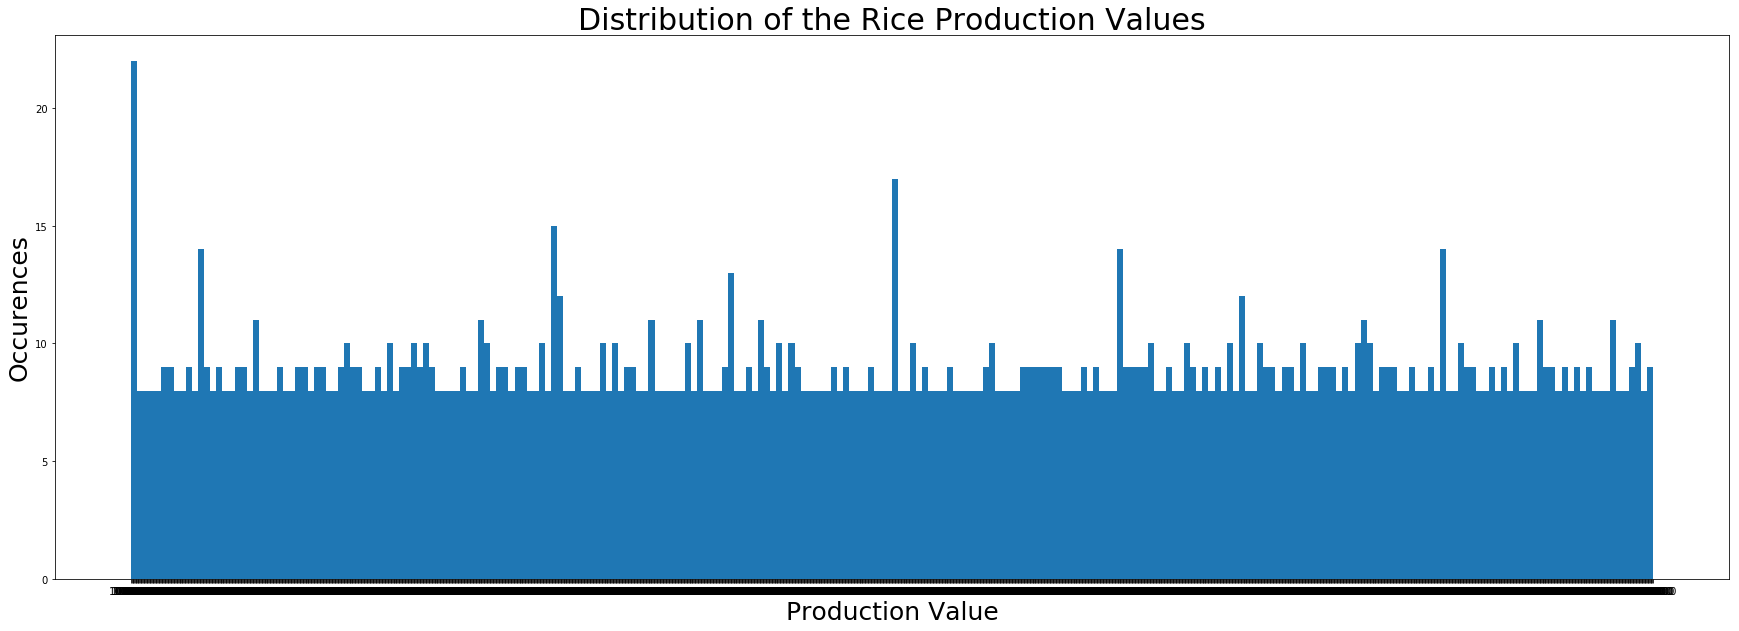

In [78]:
plt.figure(figsize=(30, 10))
plt.hist(y, bins=250)
plt.xlabel('Production Value',fontsize=25)
plt.ylabel('Occurences',fontsize=25)
plt.title('Distribution of the Rice Production Values',fontsize=30)

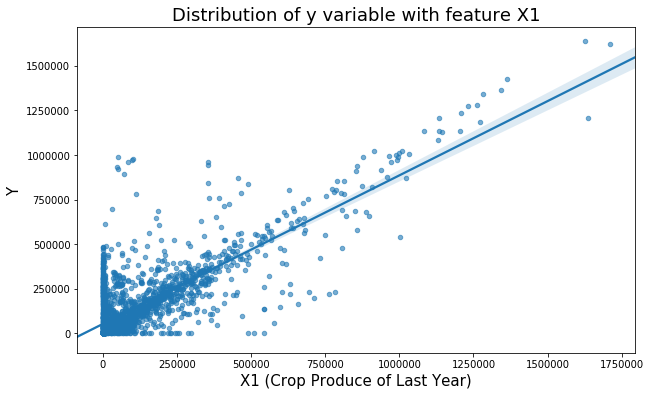

In [77]:
Xplot = ricex[["X1", "X2", "X3", "X4","Production"]]

var_name = "X1"
plt.figure(figsize=(10,6))
sns.regplot(x=var_name, y='Production', data=Xplot, scatter_kws={'alpha':0.6, 's':20})
plt.xlabel(var_name + " (Crop Produce of Last Year)", fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title("Distribution of y variable with feature "+var_name, fontsize=18)
plt.show()

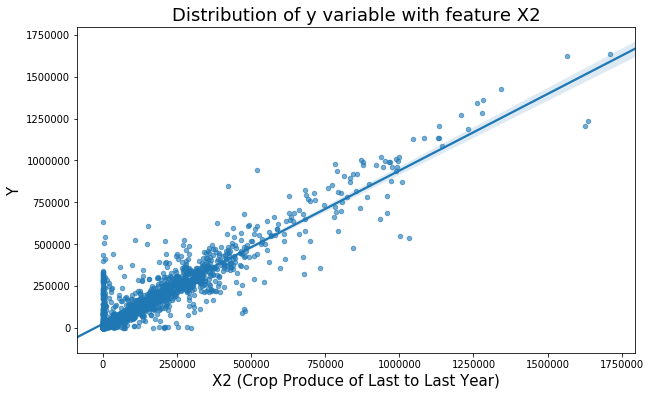

In [82]:
Xplot = ricex[["X1", "X2", "X3", "X4","Production"]]

var_name = "X2"
plt.figure(figsize=(10,6))
sns.regplot(x=var_name, y='Production', data=Xplot, scatter_kws={'alpha':0.6, 's':20})
plt.xlabel(var_name + " (Crop Produce of Last to Last Year)", fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title("Distribution of y variable with feature "+var_name, fontsize=18)
plt.show()

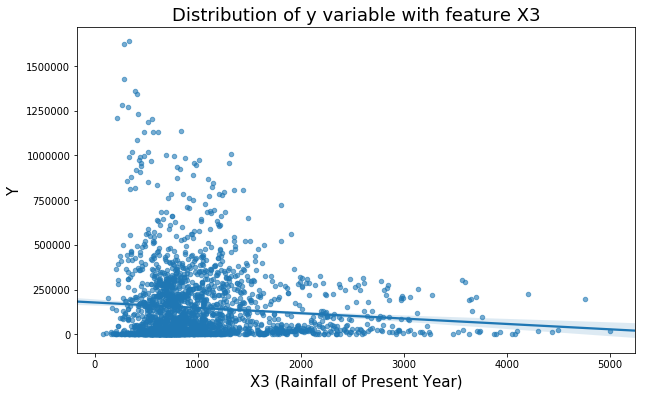

In [83]:
Xplot = ricex[["X1", "X2", "X3", "X4","Production"]]

var_name = "X3"
plt.figure(figsize=(10,6))
sns.regplot(x=var_name, y='Production', data=Xplot, scatter_kws={'alpha':0.6, 's':20})
plt.xlabel(var_name + " (Rainfall of Present Year)", fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title("Distribution of y variable with feature "+var_name, fontsize=18)
plt.show()

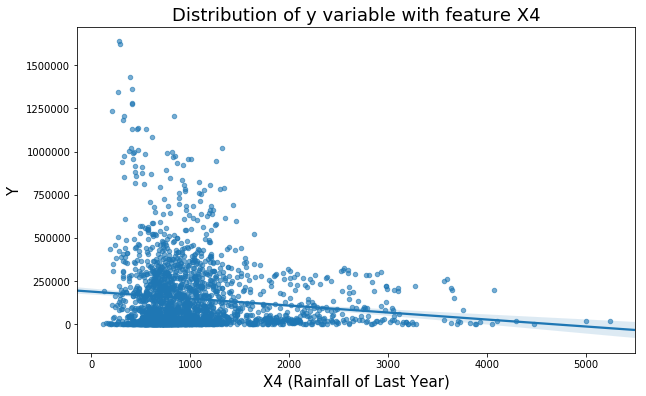

In [84]:
Xplot = ricex[["X1", "X2", "X3", "X4","Production"]]

var_name = "X4"
plt.figure(figsize=(10,6))
sns.regplot(x=var_name, y='Production', data=Xplot, scatter_kws={'alpha':0.6, 's':20})
plt.xlabel(var_name + " (Rainfall of Last Year)", fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title("Distribution of y variable with feature "+var_name, fontsize=18)
plt.show()

In [85]:
# Z-Score Normalization

cols = list(X.columns)
for col in cols:
    col_zscore = col + '_zscore'
    X[col_zscore] = (X[col] - X[col].mean())/X[col].std(ddof=0)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [86]:
X = X[["X1_zscore", "X2_zscore", "X3_zscore", "X4_zscore"]]

In [87]:
X.head()

,X1_zscore,X2_zscore,X3_zscore,X4_zscore
9,-0.390598,-0.291085,-0.241334,-0.394757
11,-0.255498,-0.187936,-0.611623,-0.261568
13,-0.348092,-0.148017,-0.419073,-0.636660
15,-0.289344,-0.087294,-0.711895,-0.441613
17,-0.026914,-0.193677,-0.773053,-0.738233


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [89]:
alg = LinearRegression()
alg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
coef = alg.coef_

In [92]:
coef = coef.round(decimals=2)
pp = pprint.PrettyPrinter()
pp.pprint(coef)

array([[  38573.18,  158184.25,   18750.67,  -13781.87]])


In [93]:
y_predict = alg.predict(X_test)

In [94]:
yp = y_predict
yt = y_test.as_matrix()
type(y_predict)

numpy.ndarray

In [95]:
rmse = sqrt(mean_squared_error(y_predict, y_test))
print(rmse)

70628.2264795402


In [96]:
yt = yt/1000
yp = yp/1000
yt = yt.round(decimals=1)
yp = yp.round(decimals=1)

In [97]:
yo = np.concatenate((yp,yt),axis=1)

In [98]:
p = pd.DataFrame(data=yo,columns=['Predicted','Actual'])
p.describe()

,Predicted,Actual
count,442.000000,442.000000
mean,138.243213,143.045928
std,191.785703,213.756353
min,2.600000,0.000000
25%,27.325000,6.200000
50%,62.950000,59.000000
75%,174.400000,191.175000
max,1255.300000,1362.000000


# Result
### This time the predictions are not as good as we got for just one state.

In [99]:
p

,Predicted,Actual
0,28.1,107.0
1,100.0,90.0
2,127.2,123.3
3,83.7,112.5
4,46.6,23.2
5,17.9,0.8
6,12.8,0.3
7,64.3,59.0
8,66.3,3.2
9,157.0,214.1


### The range of the values is (0,1362) and rmse is 70.6
We can say the results are decent but not good enough as we got with just one state.

In [100]:
rmse/1000

70.6282264795402